<a href="https://colab.research.google.com/github/colinjhorgan/MLTSA22_CHorgan/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

import statsmodels.api as sm
import glob
from pandas.plotting import scatter_matrix
import json
import os

#supress warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#set plotstyle
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [3]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
!ls kaggle

HW2  kaggle.json


In [6]:
cd /content/gdrive/MyDrive/kaggle/

/content/gdrive/MyDrive/kaggle


In [7]:
!chmod 600 kaggle.json

In [8]:
envs = json.load(open('kaggle.json', 'r'))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

os.environ


environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20220127', 'JPY_PARENT_PID': '52', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [9]:
#!mkdir HW2

In [10]:
cd HW2

/content/gdrive/MyDrive/kaggle/HW2


In [11]:
#!mkdir data

In [12]:
cd data

/content/gdrive/MyDrive/kaggle/HW2/data


In [13]:
#!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [14]:
#!unzip price-volume-data-for-all-us-stocks-etfs.zip

In [15]:
#list files in data using glob, store as sorted np array
file_list = np.sort(np.array(glob.glob('Data/Stocks/*.txt')))

In [16]:
#Read top 10 files in, keeping only Date and Close columns.
tss = pd.read_csv(file_list[0])[['Date','Close']]

for i in range(1,10):
  df = pd.read_csv(file_list[i])[['Date','Close']]
  tss = tss.merge(df, on='Date')

tss.set_index('Date', inplace=True)

#Rename columns to reflect respective stock closing value
cols = []

for i in range(0,10):
  cols.append(file_list[i].split('/')[-1].replace('.txt',''))

tss.columns = cols
tss

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68
...,...,...,...,...,...,...,...,...,...,...
2017-11-02,68.130,47.460,81.00,70.51,10.02,47.257,88.00,3.6500,35.800,39.28
2017-11-03,68.370,47.120,80.99,70.23,10.08,47.346,80.40,3.6000,36.430,37.82
2017-11-07,68.250,46.970,81.00,72.22,11.07,46.358,81.00,3.4000,34.440,37.89


In [17]:
file_list[0].split('/')[-1].replace('.txt','')

'a.us'

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


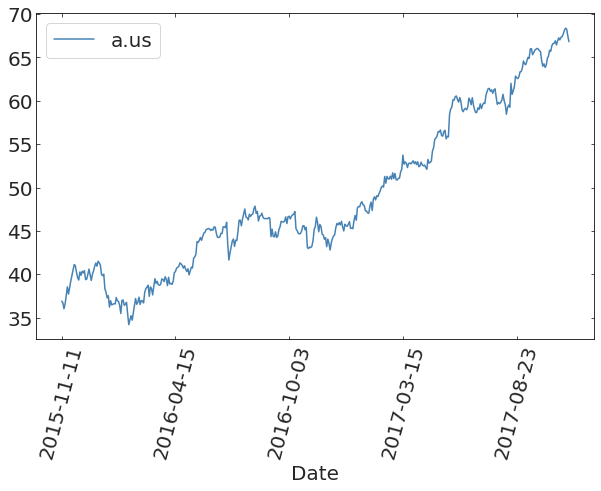

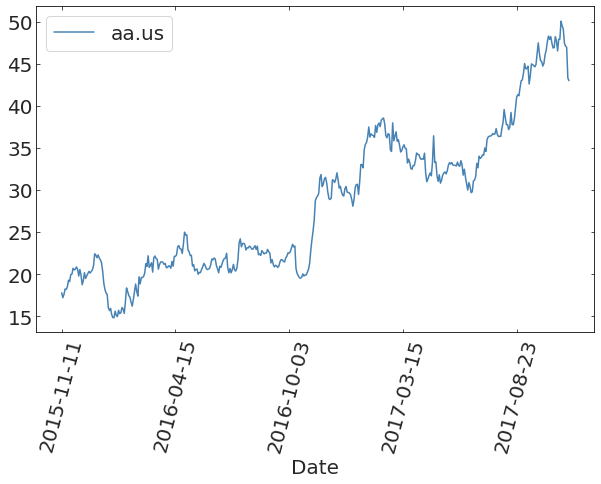

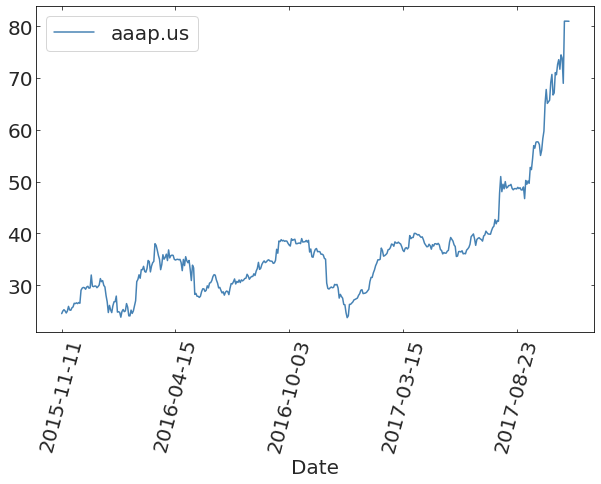

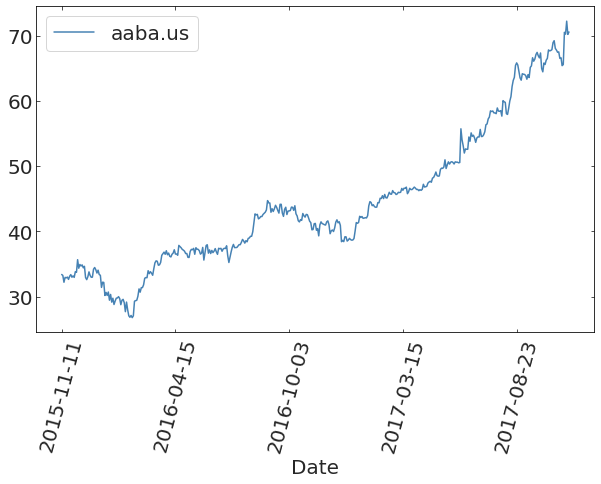

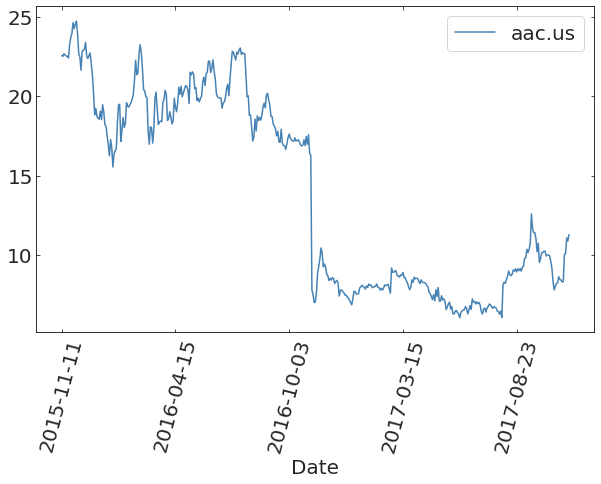

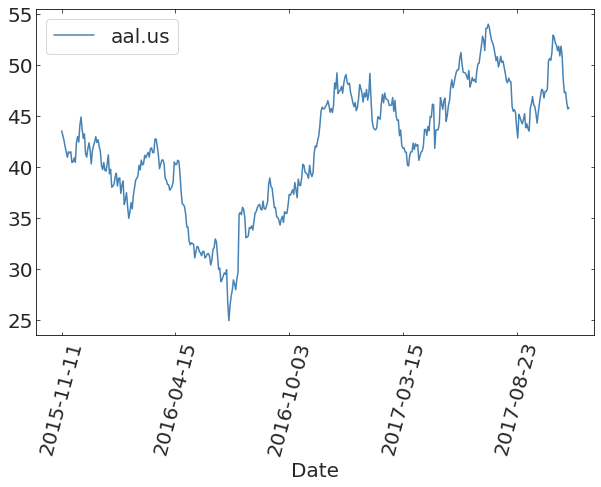

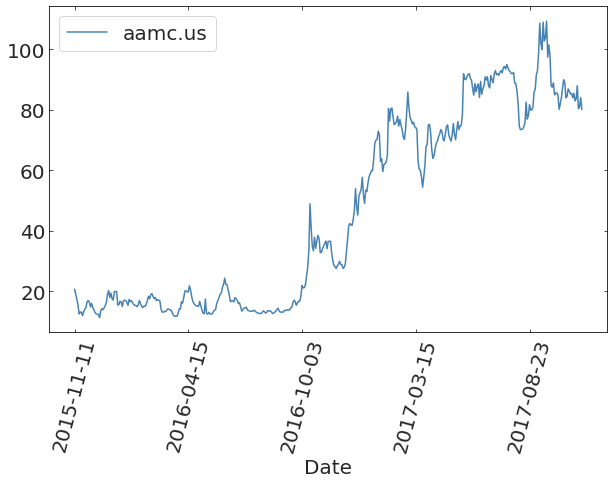

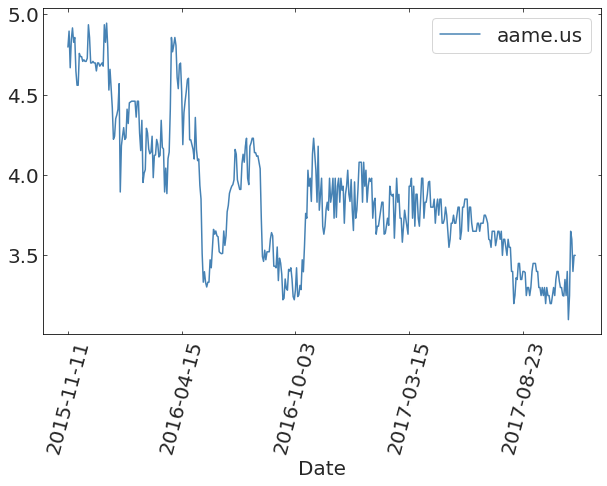

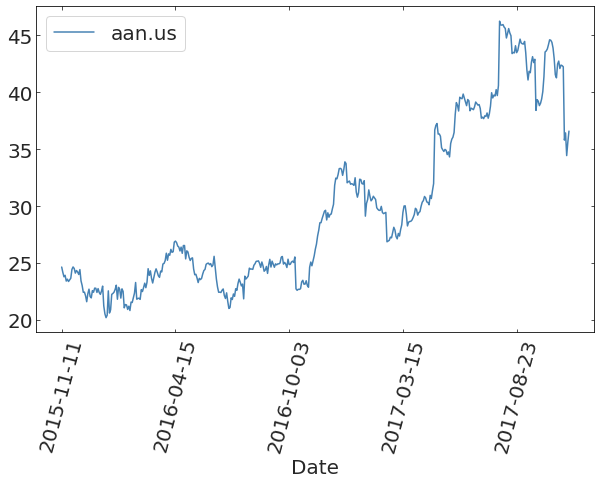

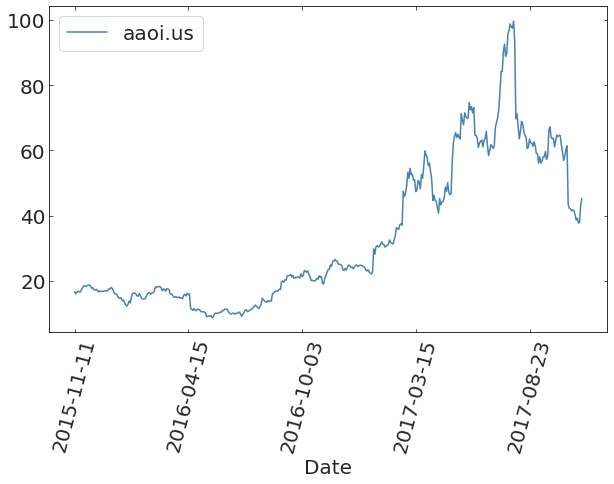

In [18]:
#Plot top 10 time series
for col in tss.columns:
  fig, ax = pl.subplots(figsize=(10,6))
  tss.plot(y=col, ax=ax, rot=75);

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


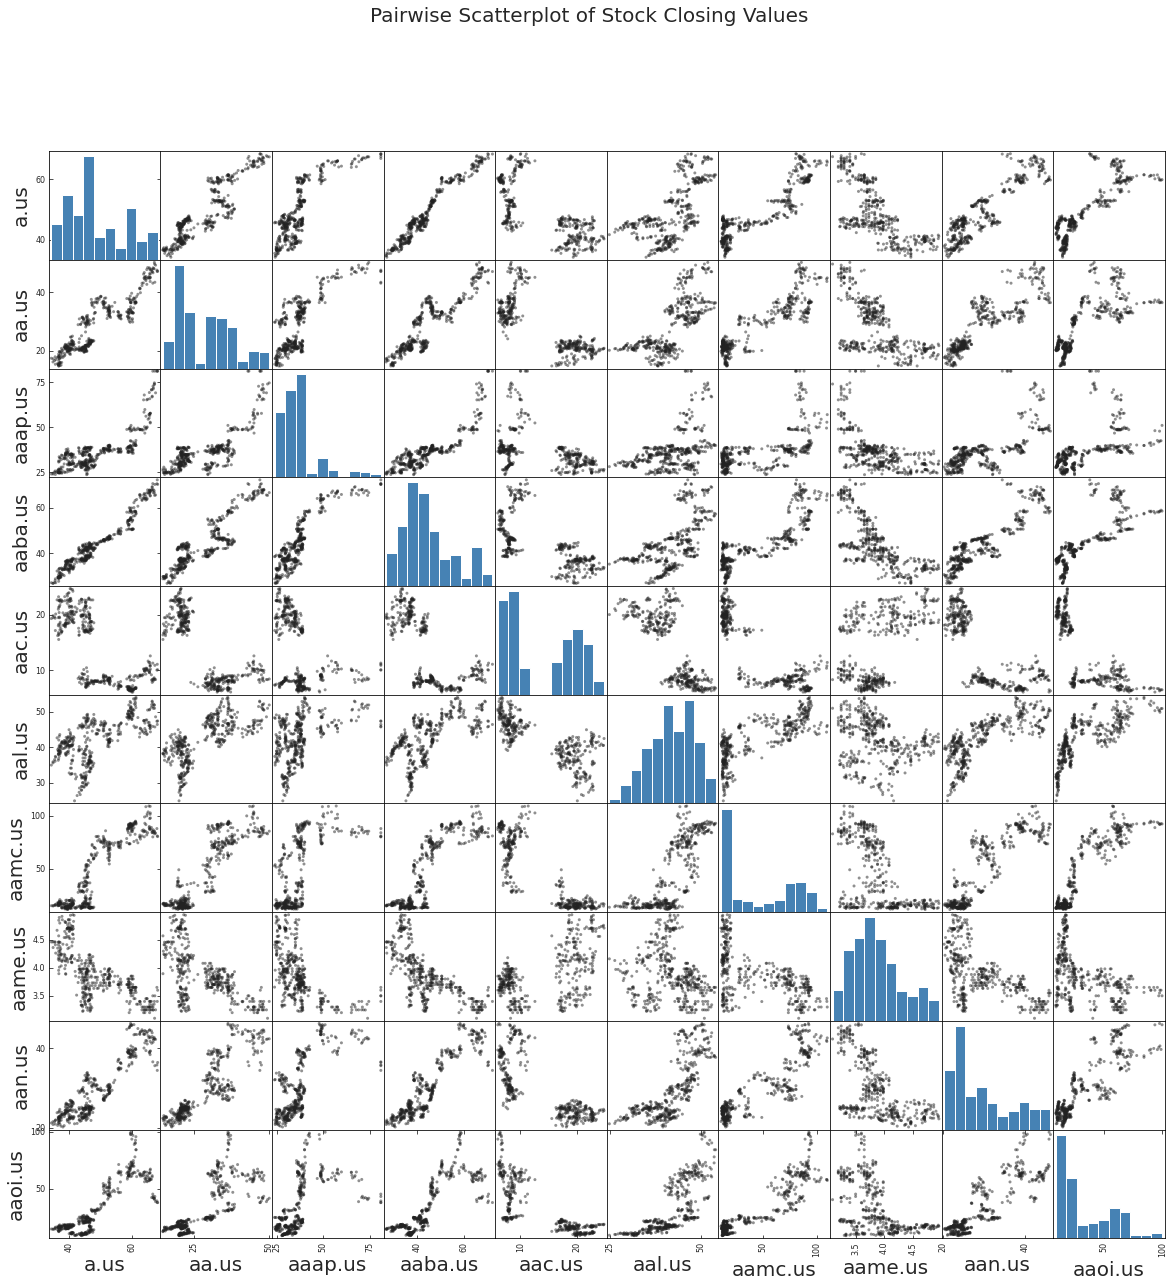

In [19]:
#plot scatter matrix
scatter_matrix(tss, color='#222222', figsize=(20,20));
pl.suptitle('Pairwise Scatterplot of Stock Closing Values',fontsize=20);

Figure 1: Pairwise scatterplots of all 10 stock closing prices. Histogram of each stock's closing values shown on figure diagonal.

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


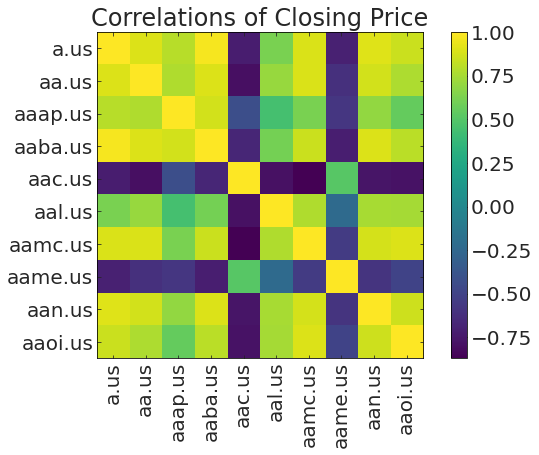

In [20]:
#plot heatmap of pairwise correlations
pl.imshow(tss.corr());
pl.colorbar()
pl.title('Correlations of Closing Price')
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90);
pl.yticks(range(len(tss.columns)), tss.columns);

Figure 2: Pairwise correlations between stock closing price. Color indicates the value of the correlation between each stock pair.

In [21]:
#Test for stationarity of closing value
print('Results from Augmented Dickey Fuller test at a p-value of 0.05')

for col in tss:
  result = sm.tsa.stattools.adfuller(tss[col])
  print(f'{col} is stationary: {result[1] <= .05}')

Results from Augmented Dickey Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
